In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
import matplotlib._color_data as mcd
palette = list(mcd.XKCD_COLORS.values())[::10]

In [3]:
topics = np.array([[-1, 1]])

In [4]:
varied_param = 'consumer_delay_sensitivity'
varied_param_legend_label = 'Consumer Delay Sensitivity'
varied_param_x_label = 'Consumer Delay Sensitivity'

In [5]:
num_influencers = 1
num_agents = 10

sensitivities = list(np.linspace(0.01, 2, 15))
varied_param_values = sensitivities

In [6]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=10,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=sensitivities,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2


Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.007798457983881235s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.00372587499441579s): nit=4, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.0038488749996758997s): nit=4, nfev=12, njev=6.
Optimizing producer 3
Optimization succeeded (overall 0.003644250042270869s): nit=3, nfev=10, njev=5.
Optimizing producer 4
Optimization succeeded (overall 0.004411207977682352s): nit=3, nfev=10, njev=5.
Optimizing producer 5
Optimization succeeded (overall 0.0031945829978212714s): nit=3, nfev=10, njev=5.
Optimizing producer 6
Optimization succeeded (overall 0.0030653749709017575s): nit=3, nfev=10, njev=5.
Optimizing producer 7
Optimization succeeded (overall 0.004536167019978166s): nit=4, nfev=12, njev=6.
Opt

In [7]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

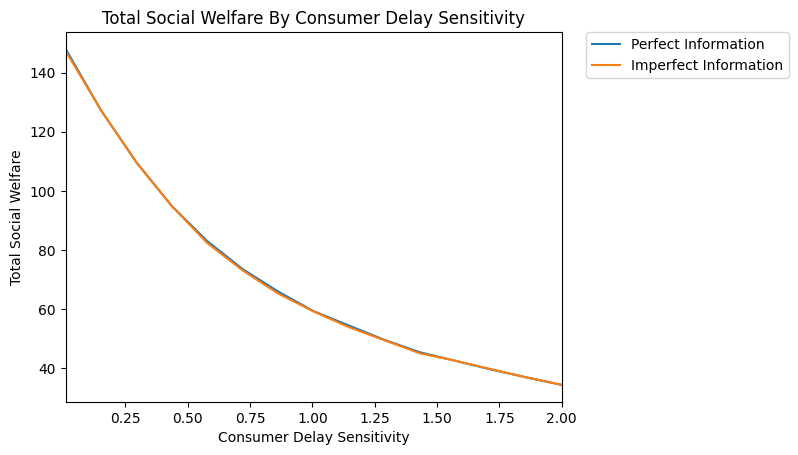

In [8]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

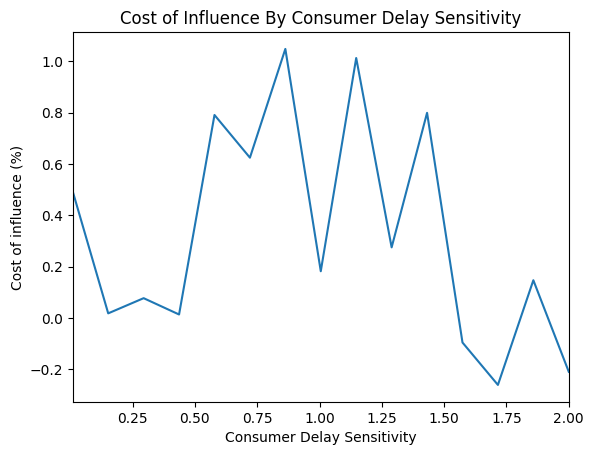

In [9]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

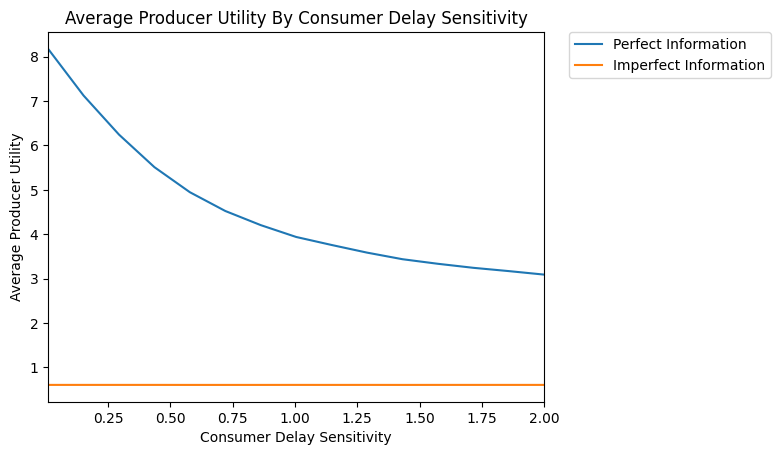

In [10]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

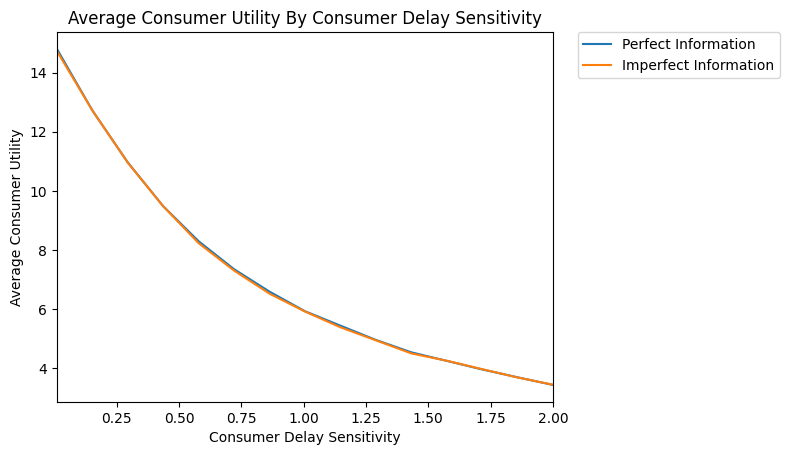

In [11]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

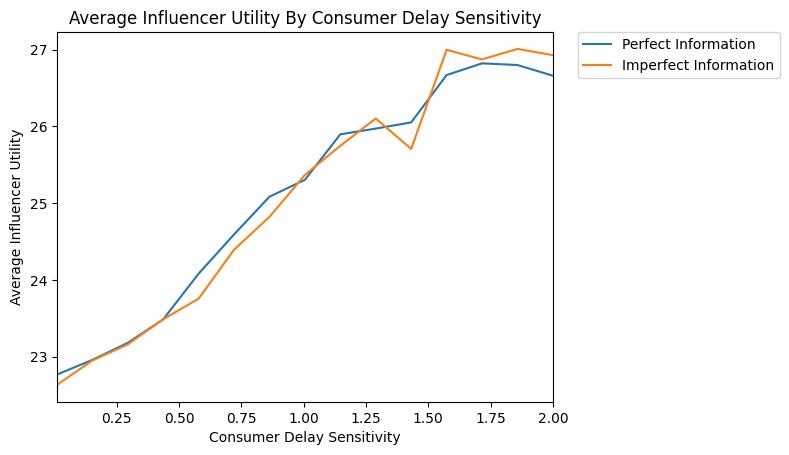

In [12]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

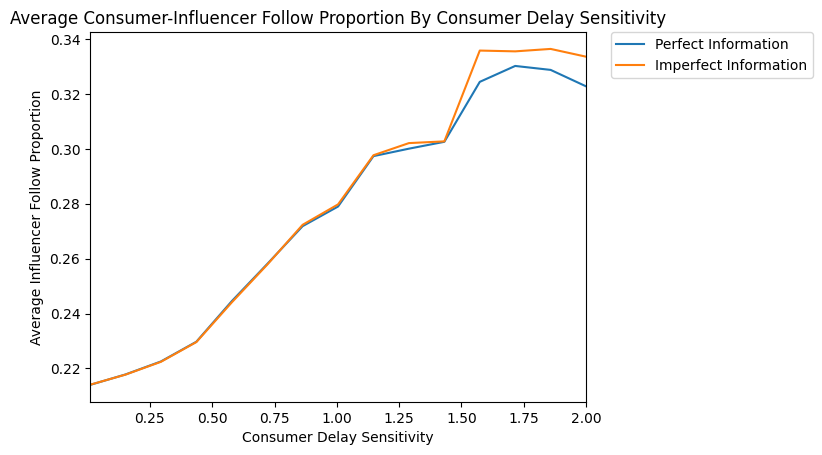

In [13]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

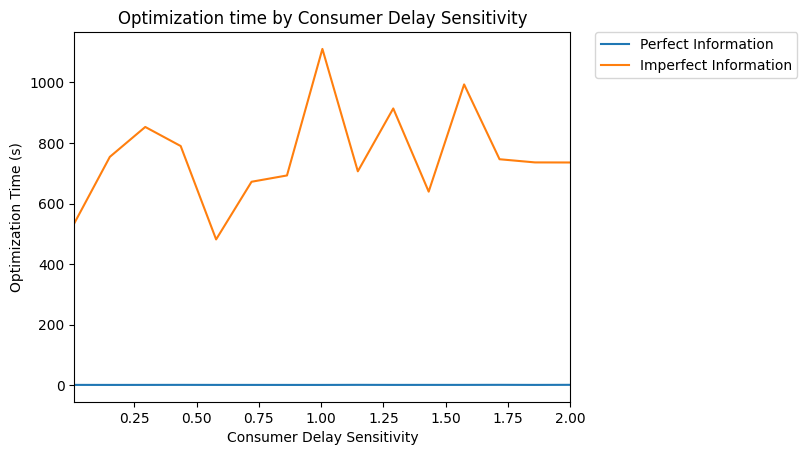

In [14]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

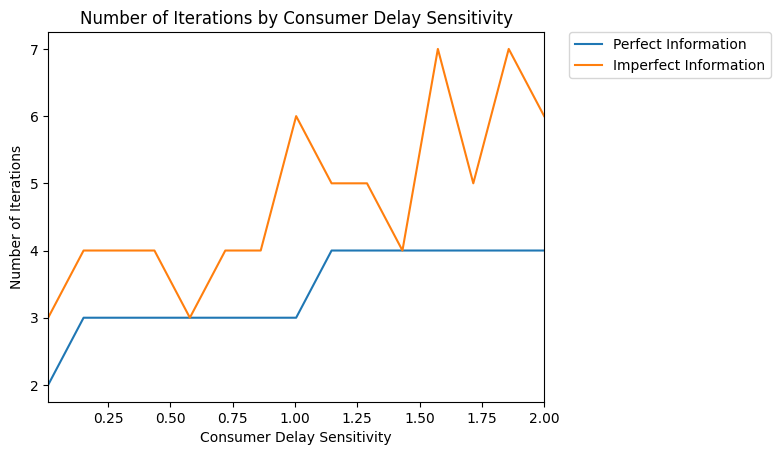

In [15]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

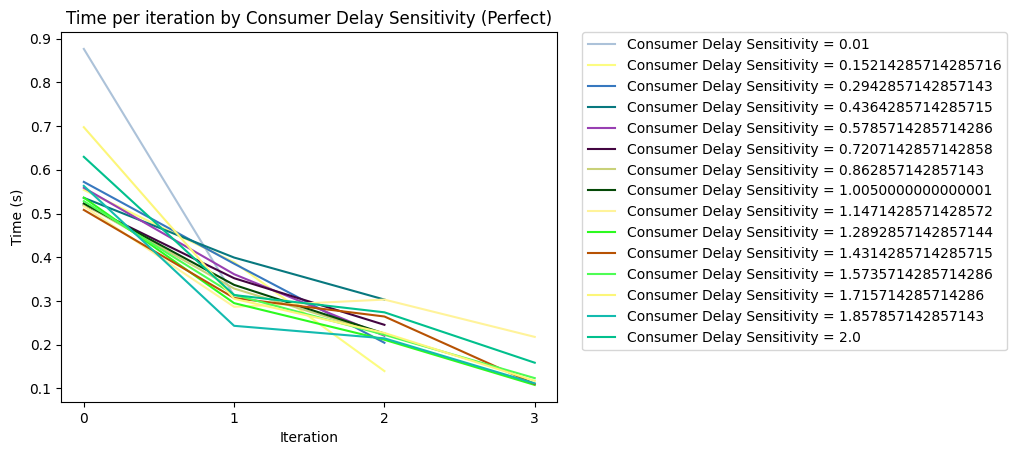

In [16]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

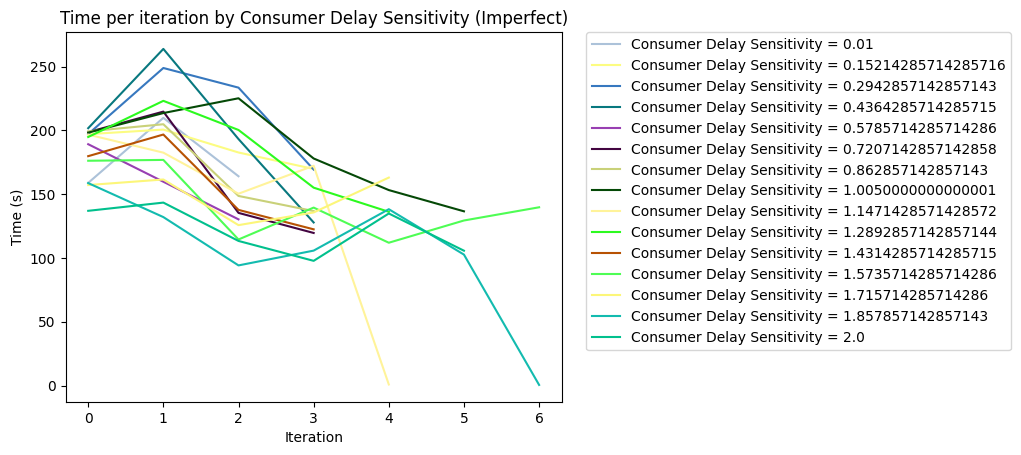

In [17]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

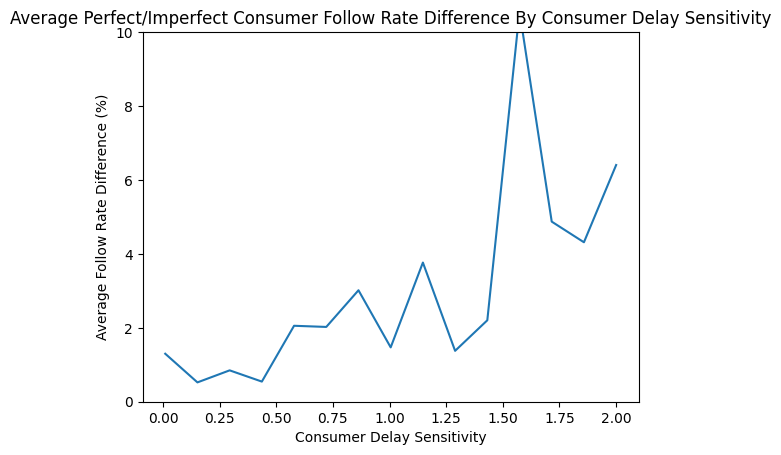

In [18]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1]) / np.linalg.norm(perfect_consumer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Perfect/Imperfect Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.ylim(0, 10)
plt.show()

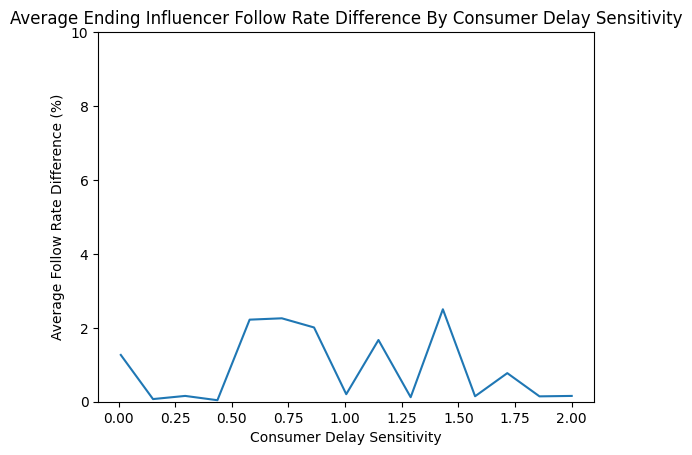

In [19]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1]) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.ylim(0, 10)
plt.show()

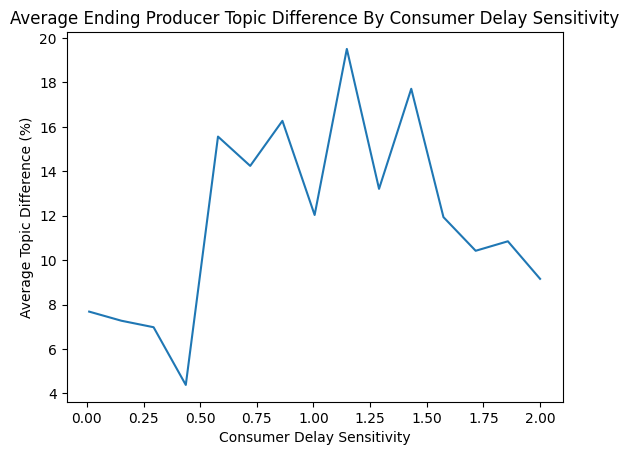

In [36]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1]) + 1e-8) * 100
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference (%)")
plt.plot(varied_param_values, avg_topic_diffs)
plt.show()


In [37]:
print(varied_param_values)

[0.01, 0.15214285714285716, 0.2942857142857143, 0.4364285714285715, 0.5785714285714286, 0.7207142857142858, 0.862857142857143, 1.0050000000000001, 1.1471428571428572, 1.2892857142857144, 1.4314285714285715, 1.5735714285714286, 1.715714285714286, 1.857857142857143, 2.0]


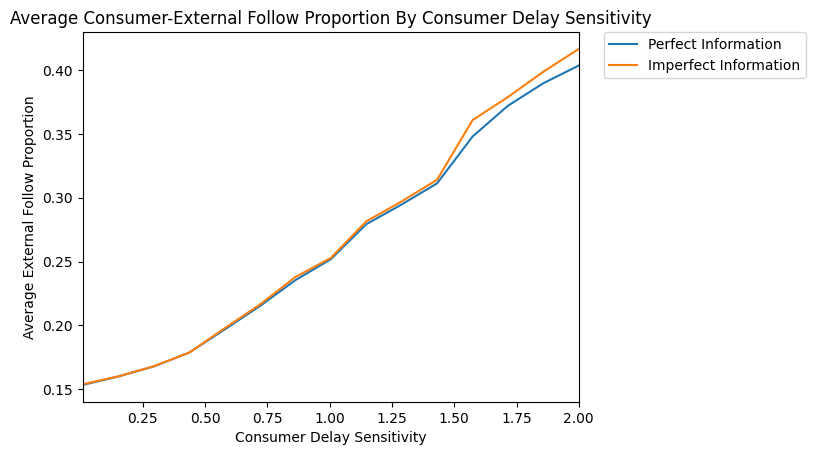

In [21]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

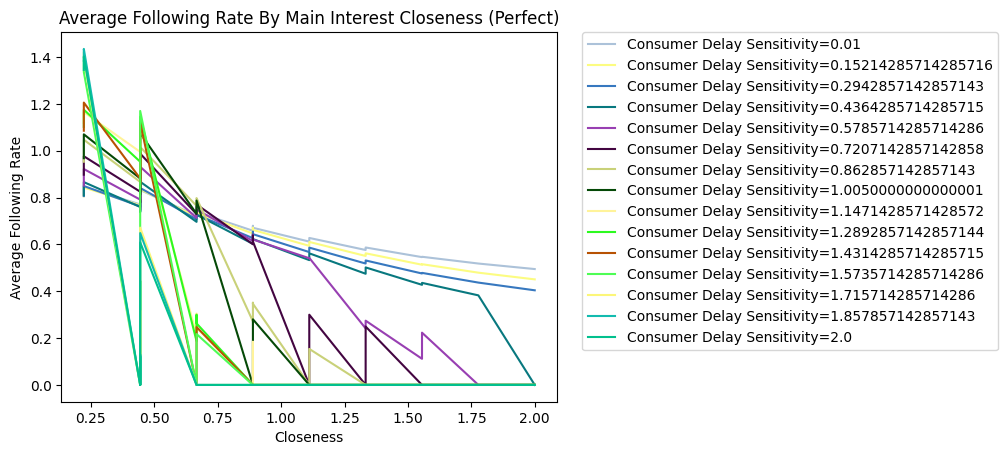

In [22]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    #rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}", color=palette[i])
plt.title(f"Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

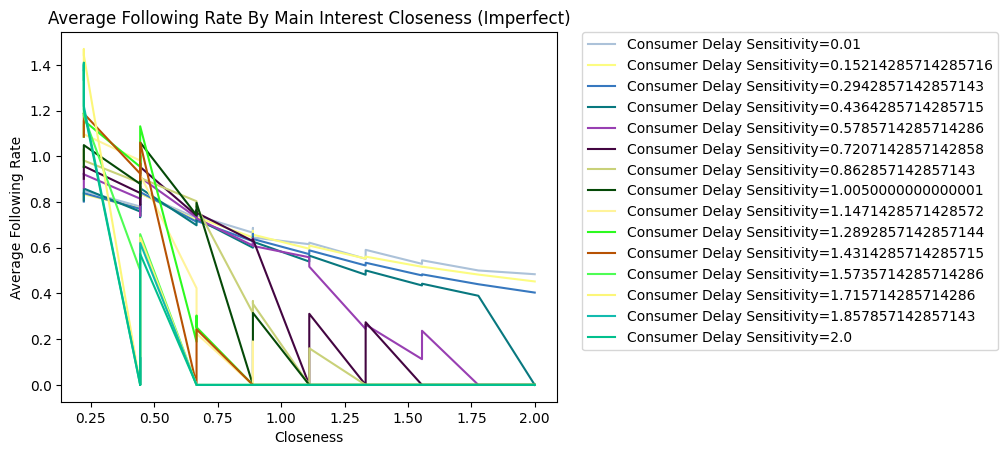

In [23]:
plt.figure()
for i in range(len(imperfect_info_stats)):
    imperfect_stat: TestStats = imperfect_info_stats[i]
    avg_rate_by_main_interest_closeness = imperfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    #rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}", color=palette[i])
plt.title(f"Average Following Rate By Main Interest Closeness (Imperfect)")
plt.xlabel("Closeness")
plt.ylabel("Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

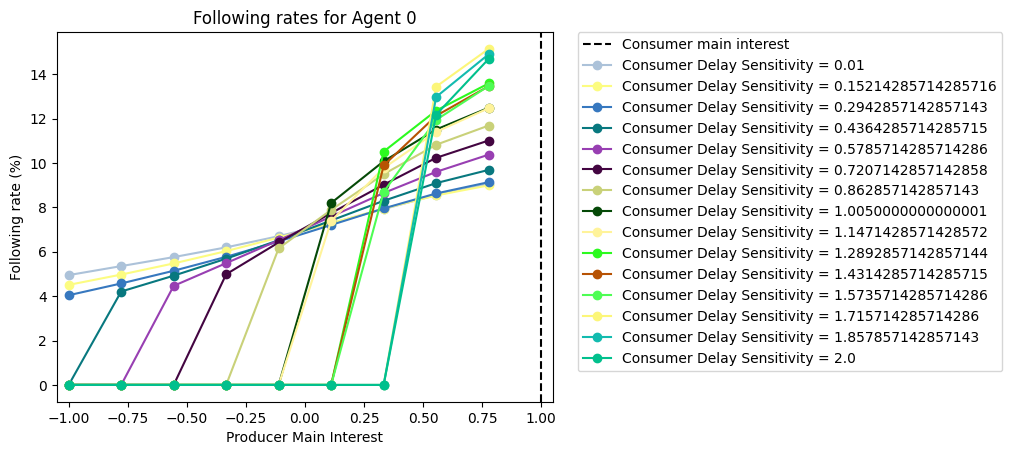

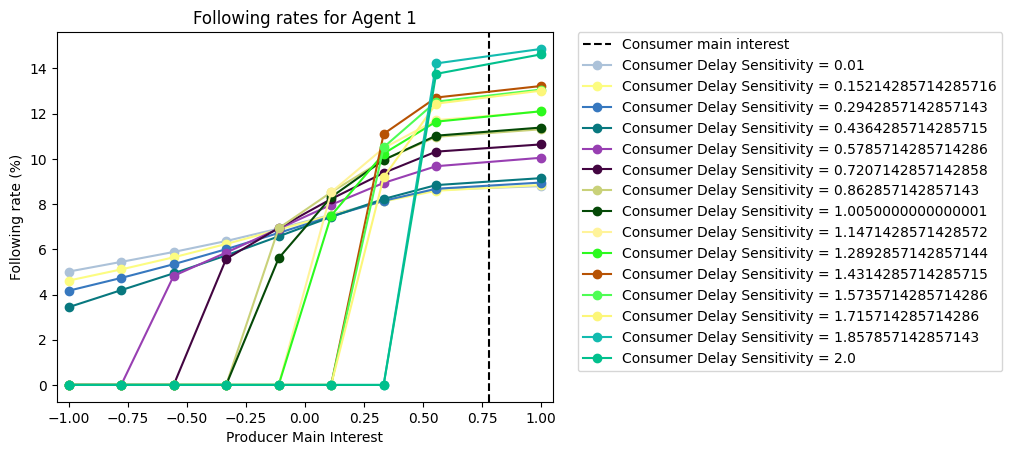

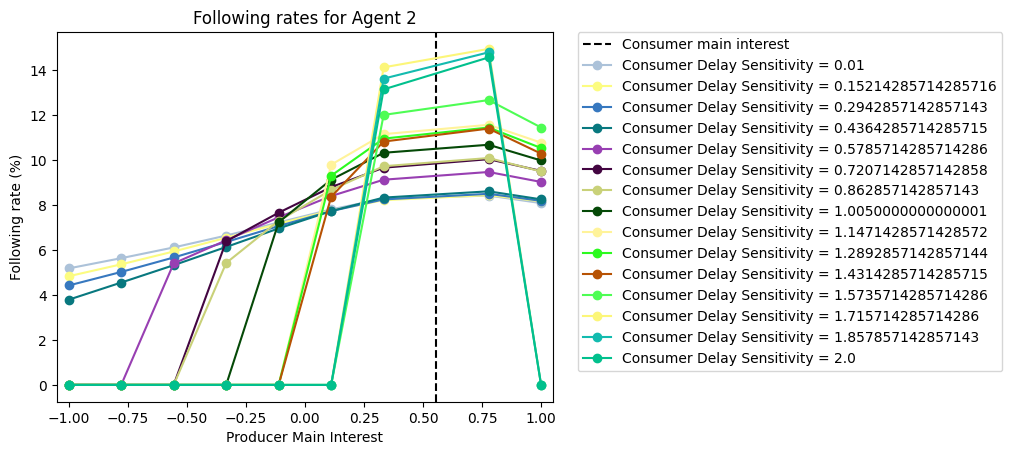

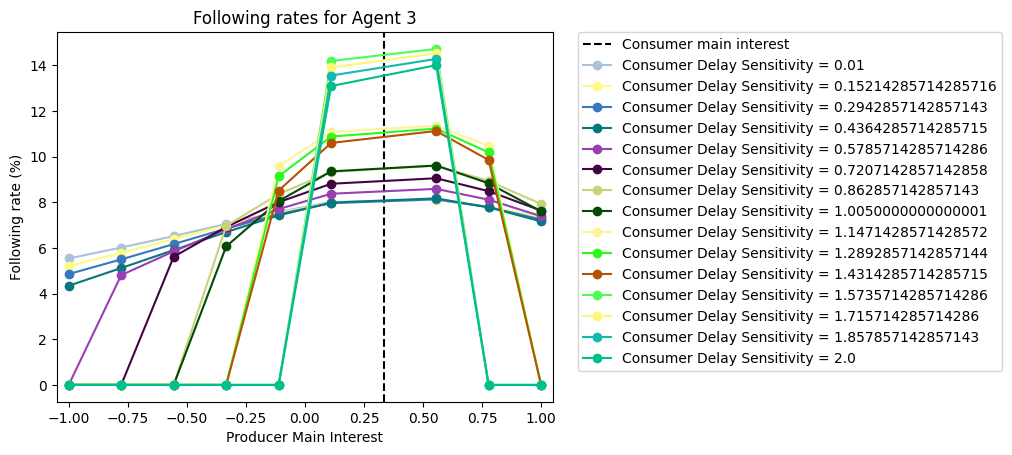

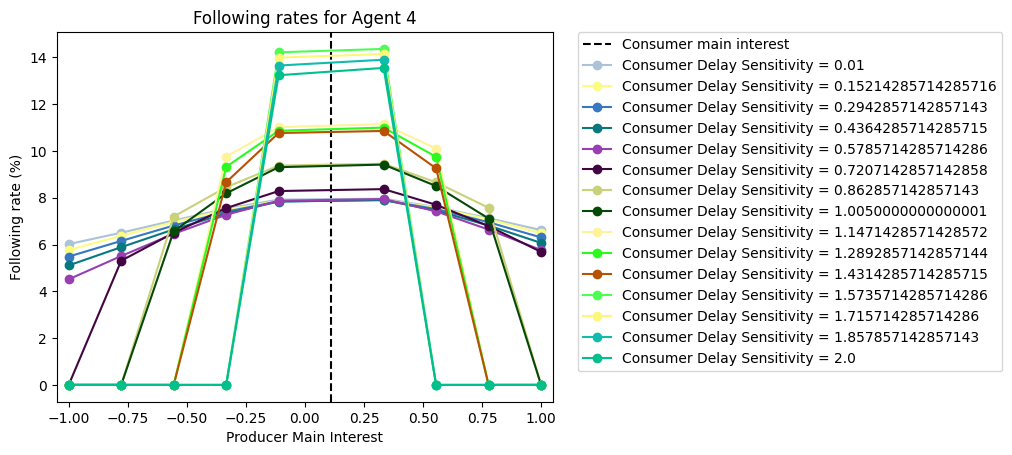

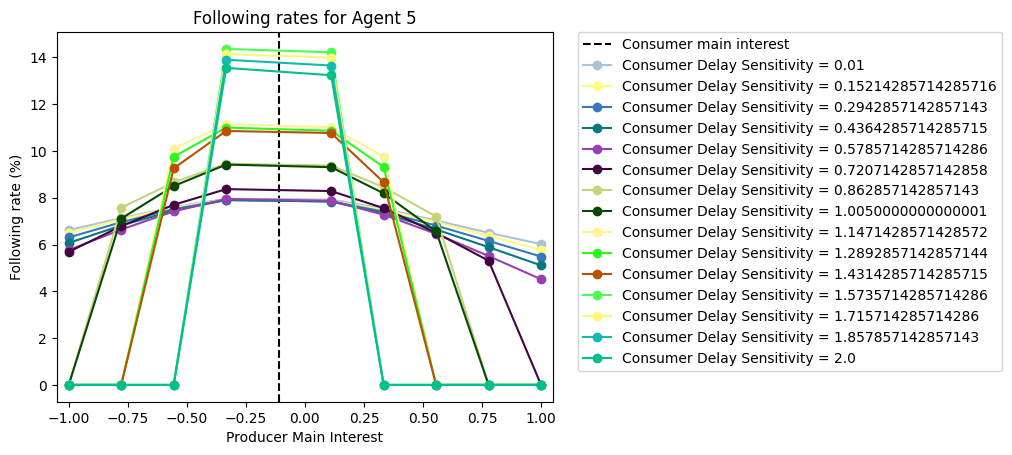

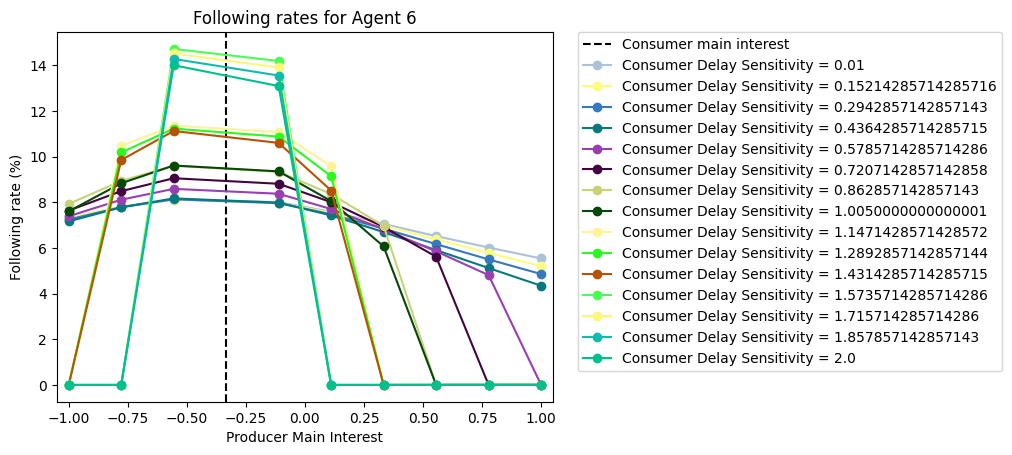

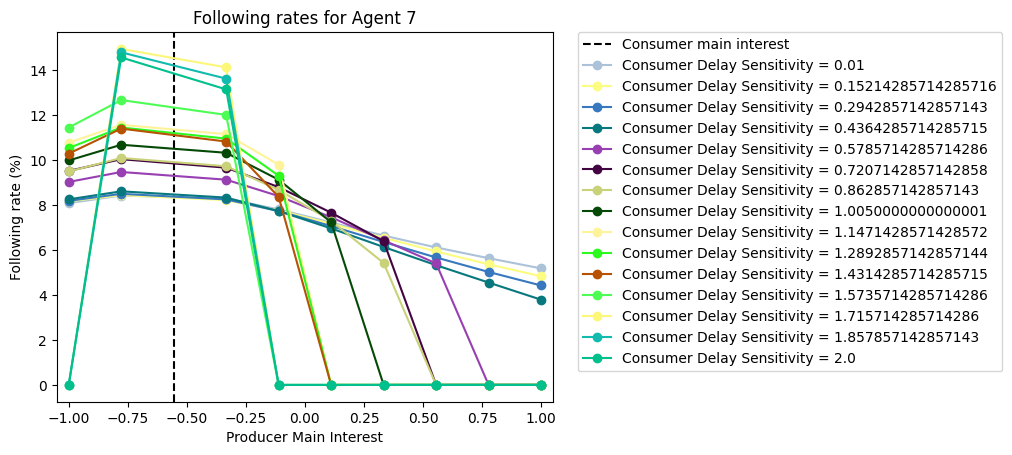

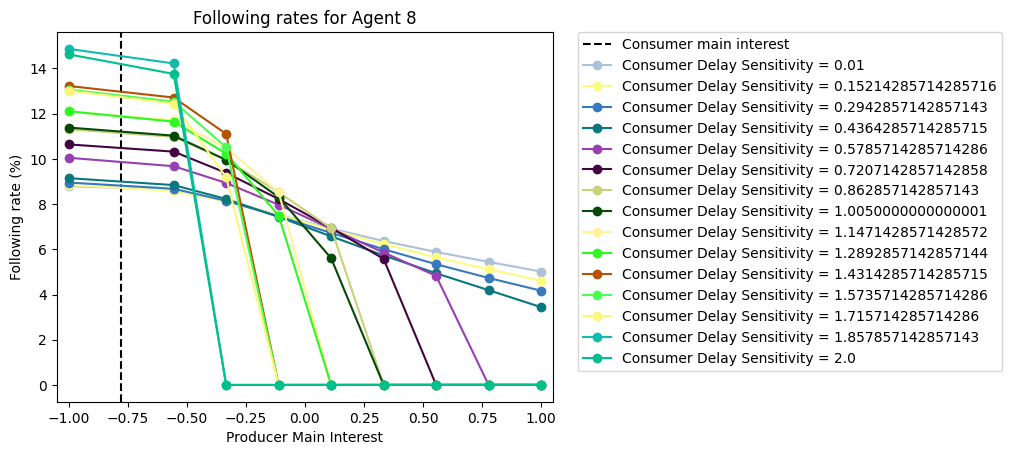

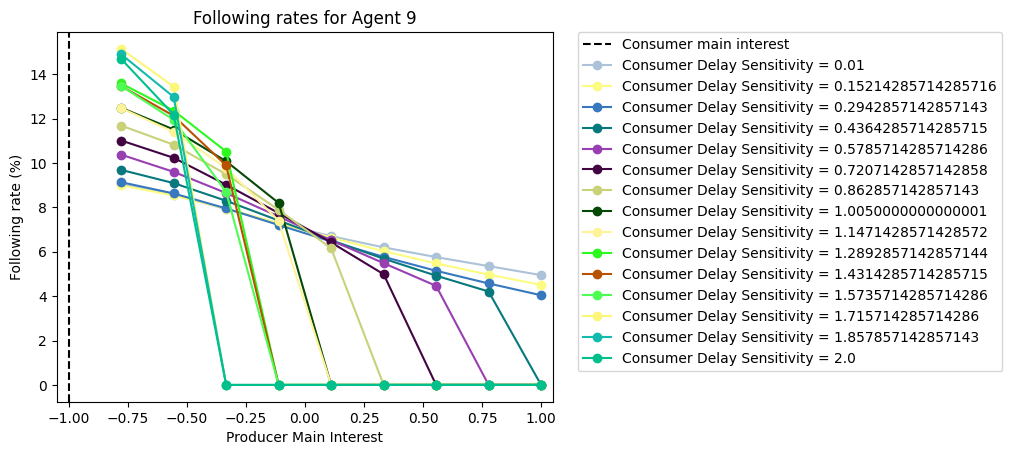

In [24]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

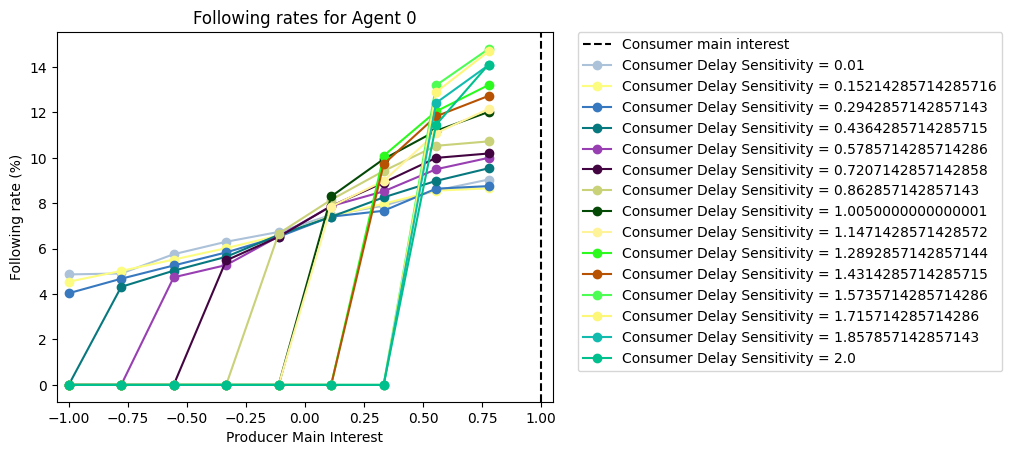

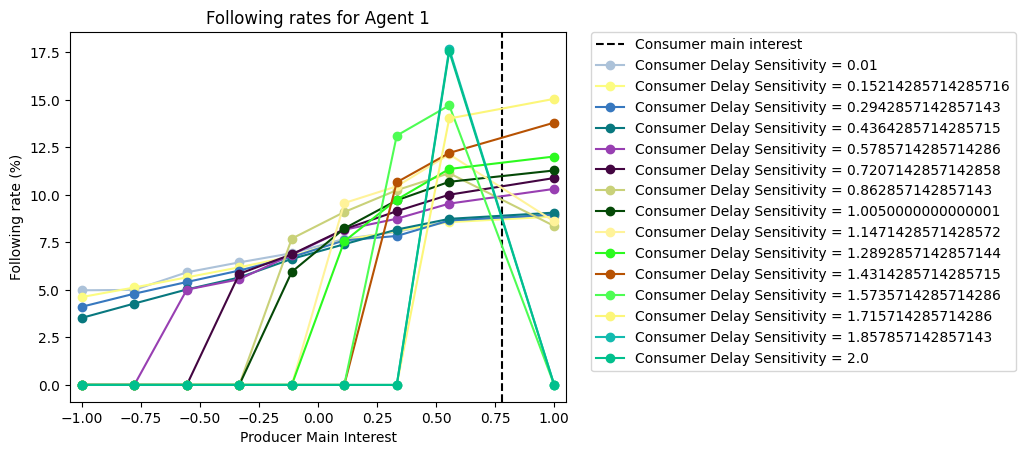

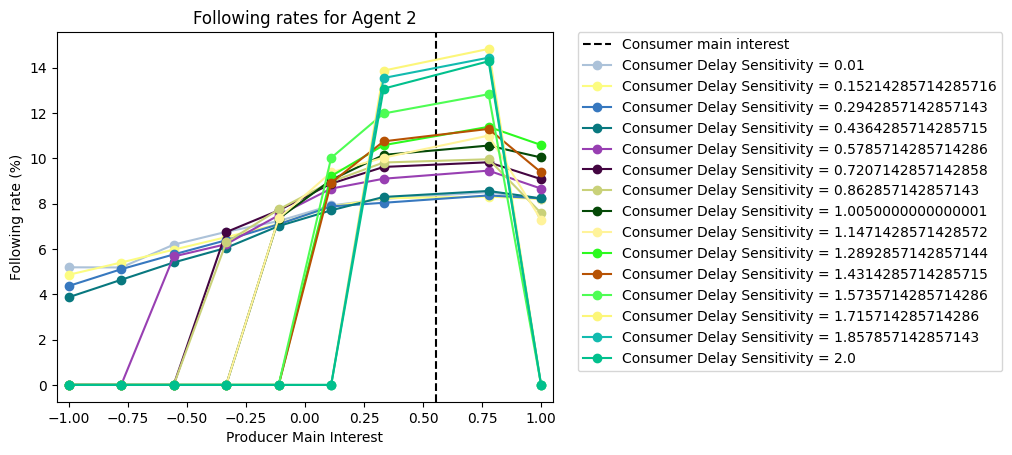

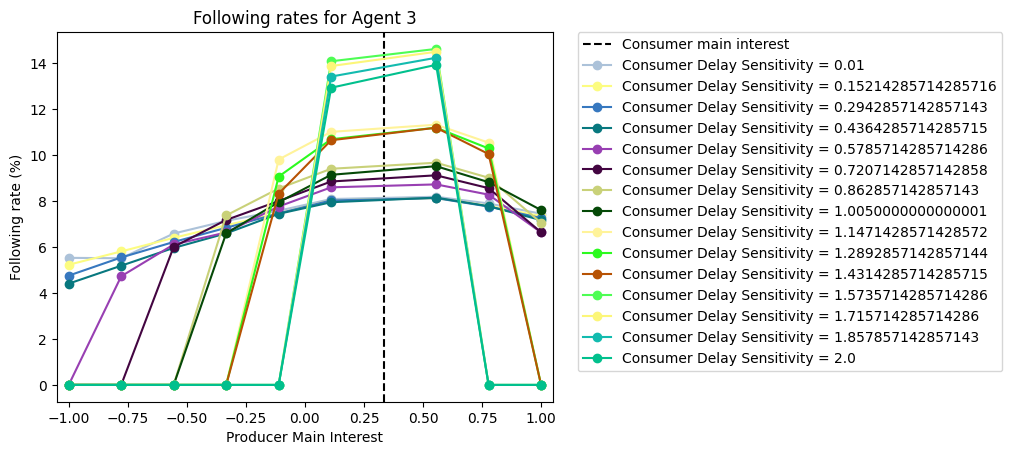

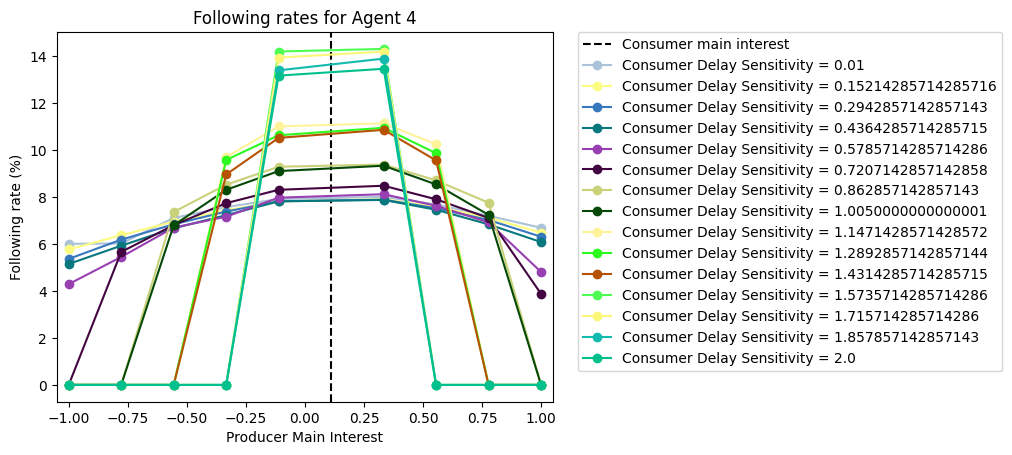

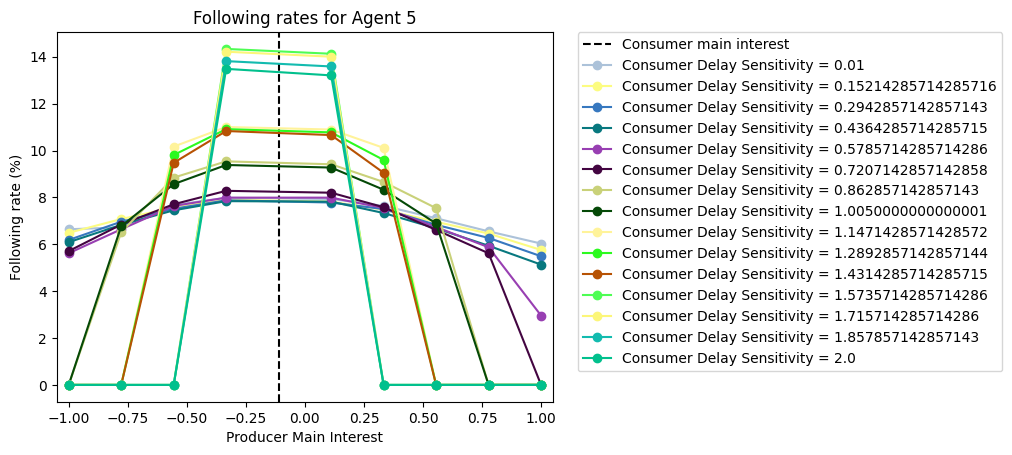

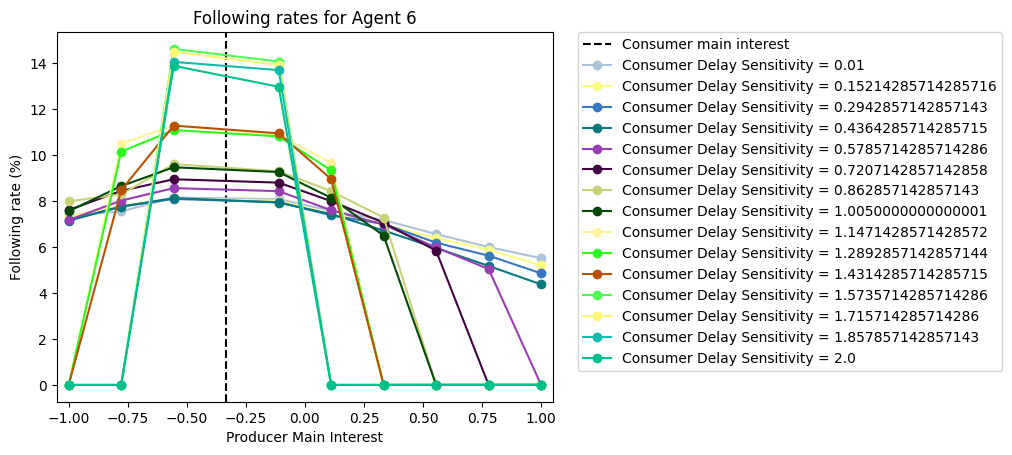

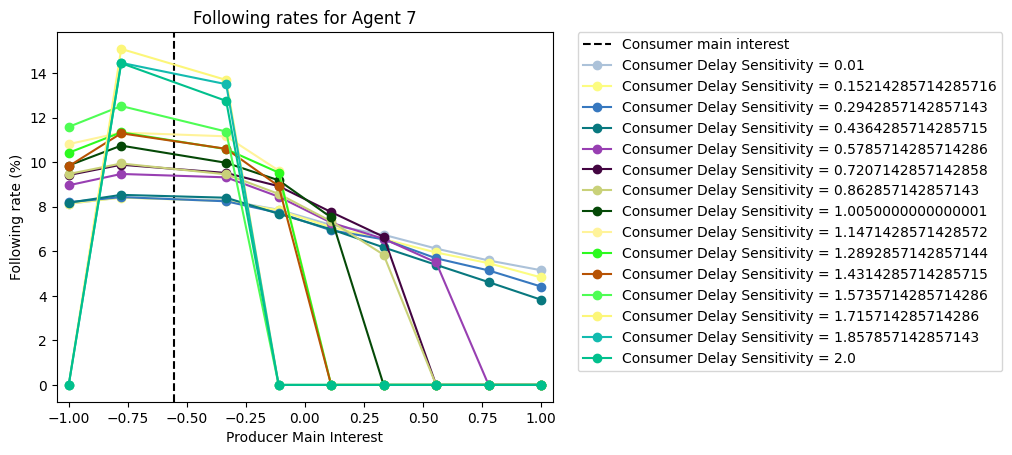

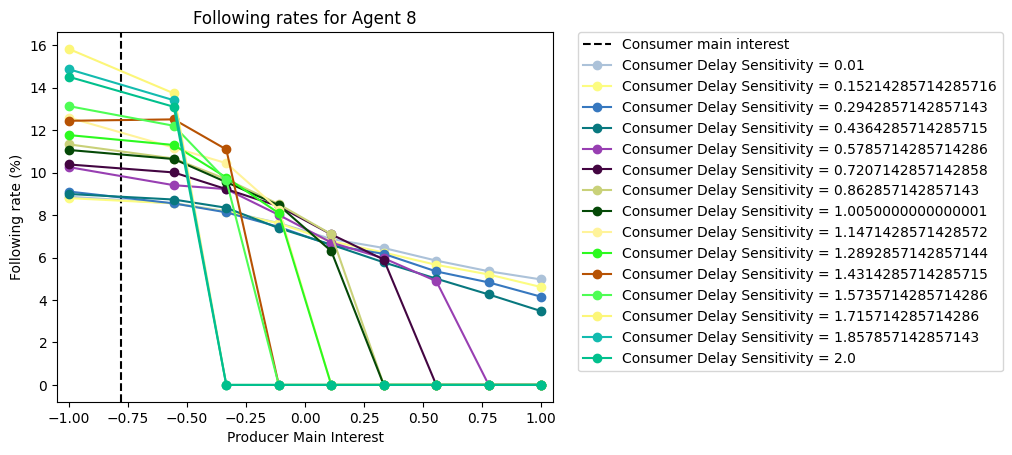

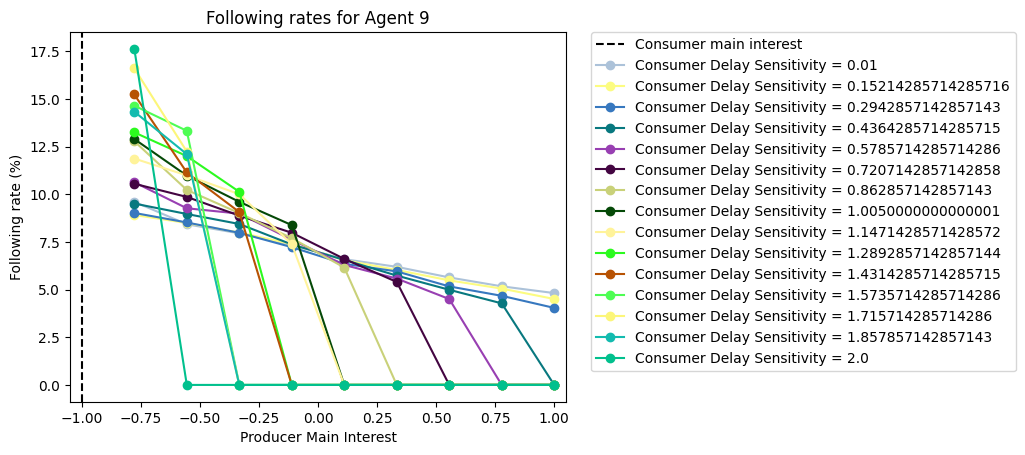

In [25]:
for i in range(num_agents):
    visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in imperfect_info_stats], varied_param_legend_label, varied_param_values)

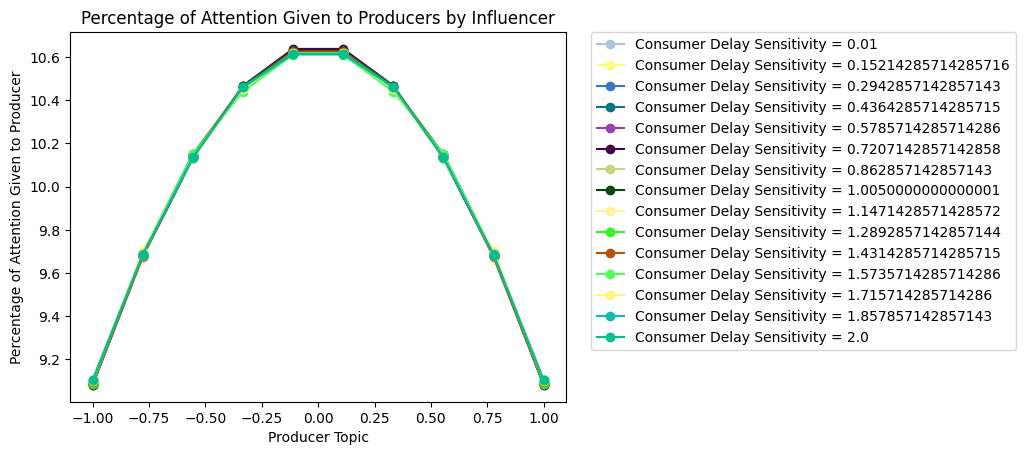

In [26]:
#visualize.plot_agent_following_rates_by_test(num_agents, [stat.influencer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

for i, (val, stat) in enumerate(zip(varied_param_values, perfect_info_stats)):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o', color=palette[i])

plt.title(f"Percentage of Attention Given to Producers by Influencer")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

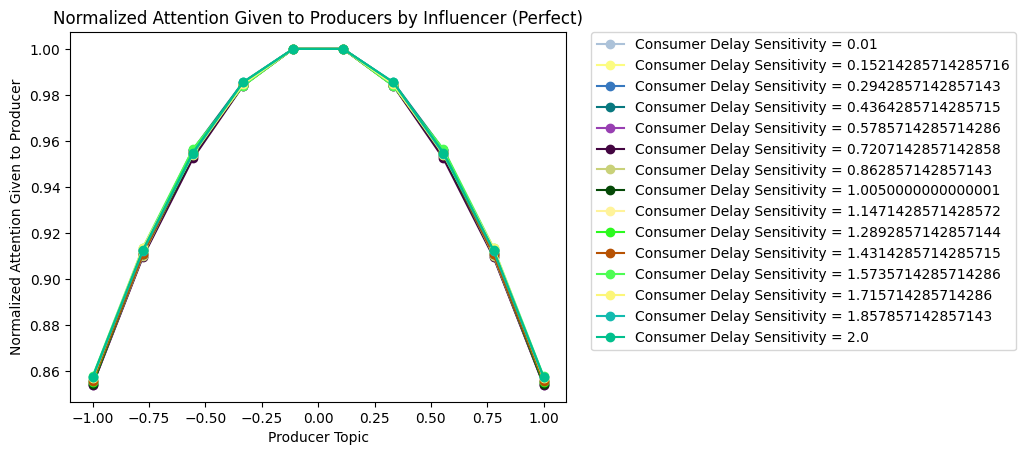

In [27]:
for i, (val, stat) in enumerate(zip(varied_param_values, perfect_info_stats)):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o', color=palette[i])

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

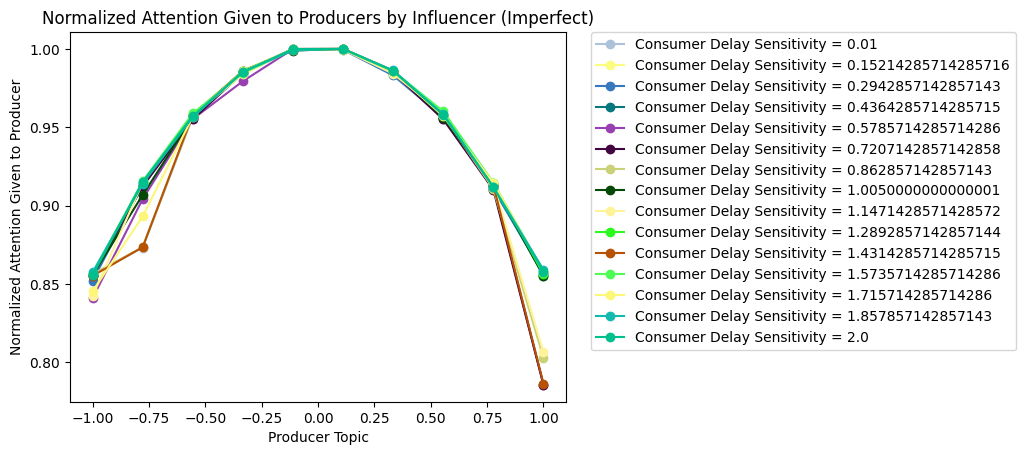

In [28]:
for i, (val, stat) in enumerate(zip(varied_param_values, imperfect_info_stats)):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o', color=palette[i])

plt.title(f"Normalized Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

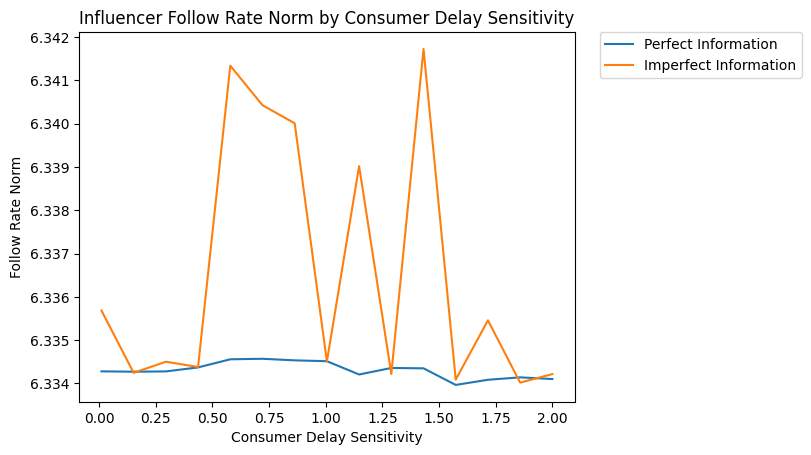

In [29]:
perf_norms = []
imperf_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(following_rates)
    perf_norms.append(perf_norm)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(following_rates)
    imperf_norms.append(imperf_norm)

plt.plot(varied_param_values, perf_norms, label='Perfect Information')
plt.plot(varied_param_values, imperf_norms, label='Imperfect Information')
plt.title(f"Influencer Follow Rate Norm by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Follow Rate Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

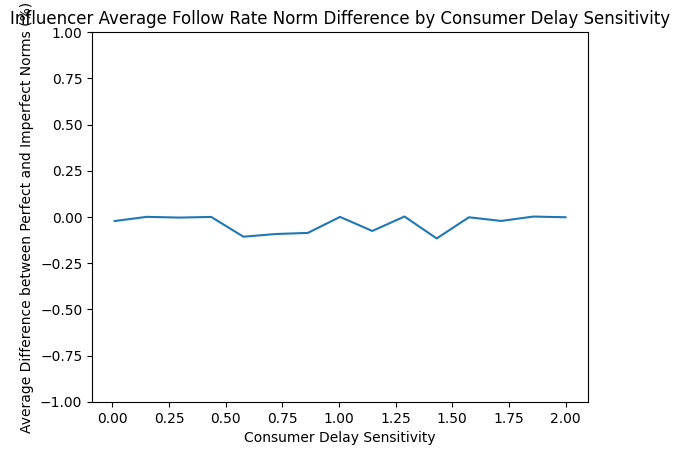

In [30]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(perf_following_rates)
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(imperf_following_rates)
    avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.influencer_stats)
    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Influencer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Difference between Perfect and Imperfect Norms (%)")
plt.ylim(-1, 1)
plt.show()

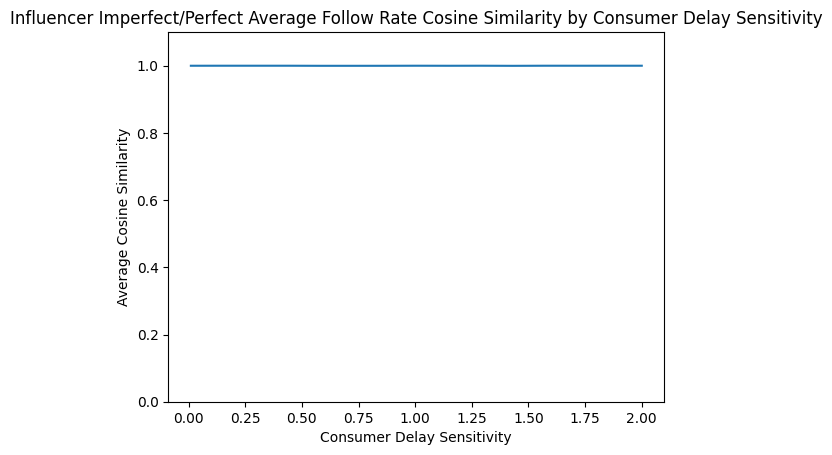

In [31]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    influencer_ind = num_agents
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.influencer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
plt.title(f"Influencer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.ylim(0, 1.1)
plt.show()

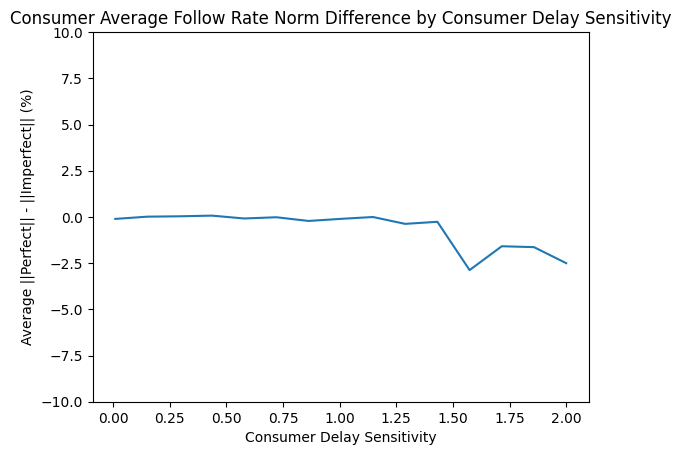

In [32]:
difference_of_norms = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        perf_norm = np.linalg.norm(perf_following_rates)
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        imperf_norm = np.linalg.norm(imperf_following_rates)
        avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.consumer_stats)

    difference_of_norms.append(avg_difference_of_norms)

plt.plot(varied_param_values, difference_of_norms)
plt.title(f"Consumer Average Follow Rate Norm Difference by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average ||Perfect|| - ||Imperfect|| (%)")
plt.ylim(-10, 10)
plt.show()

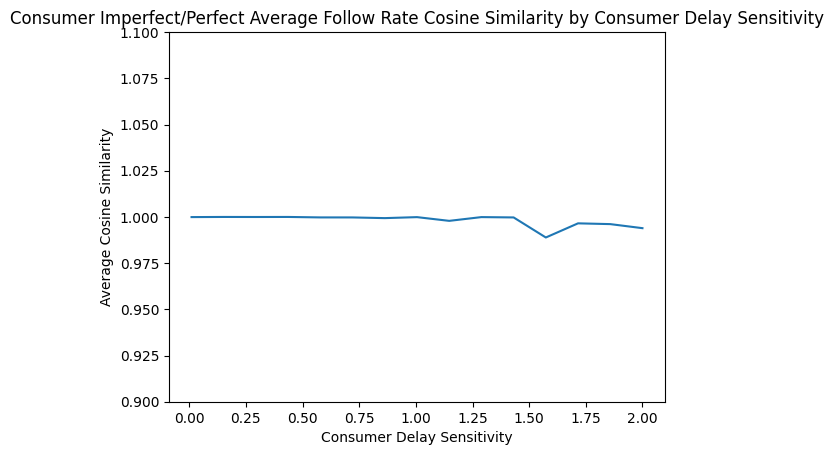

In [33]:
cosine_similarities = []
for val, perf_stat, imperf_stat in zip(varied_param_values, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.consumer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(varied_param_values, cosine_similarities)
plt.title(f"Consumer Imperfect/Perfect Average Follow Rate Cosine Similarity by {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Cosine Similarity")
plt.ylim(0.9, 1.1)
plt.show()

In [34]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 147.98586174519102, 147.98815589991975], 'total_producer_utility': [0, 81.76550694189838, 81.73362485705897], 'total_influencer_utility': [0, 22.803041355366346, 22.76650103464038], 'total_social_welfare': [0, 147.98586174519102, 147.98815589991975], 'average_consumer_rate_change': [0, 1.5871588998595691, 0.09514494199841178], 'average_producer_topic_change': [0, 0.16467731248939033, 0.000316839166877575], 'average_influencer_rate_change': [0, 0.533756448590611, 0.1830400075474296], 'average_consumer_utility_change': [0, 14.798586174519098, 0.00022941547287587128], 'average_producer_utility_change': [0, 8.176550694189839, -0.0031882084839413237], 'average_influencer_utility_change': [0, 22.803041355366346, -0.03654032072596536], 'consumer_stats': {0: {'utilities': [0, 11.62762553427115, 11.62908092032071], 'utility_change': [0, 11.62762553427115, 0.0014553860495603033], 'optimization_times': [0.10326549998717383, 0.021371959010139108]

In [35]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 3, 'total_consumer_utility': [0, 145.59033640285625, 147.24214307600852, 147.2591793618679], 'total_producer_utility': [0, 6.05191236844676, 6.057134447027179, 6.057134447027179], 'total_influencer_utility': [0, 22.363520740600126, 22.635155567444126, 22.6319328015766], 'total_social_welfare': [0, 145.59033640285625, 147.24214307600852, 147.2591793618679], 'average_consumer_rate_change': [0, 1.5871588998595691, 0.07940546002445577, 0.05457921367955917], 'average_producer_topic_change': [0, 0.09096305391169662, 0.06716804301101018, 0.005194151374284808], 'average_influencer_rate_change': [0, 0.533756448590611, 0.1285869219917017, 0.14340796909913006], 'average_consumer_utility_change': [0, 14.559033640285625, 0.165180667315229, 0.0017036285859349577], 'average_producer_utility_change': [0, 0.605191236844676, 0.0005222078580420564, 0.0], 'average_influencer_utility_change': [0, 22.363520740600126, 0.2716348268440001, -0.003222765867526789], 'consumer_stats': {0: {'util